In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
hour_data = pd.read_csv('/Users/rishithareddychintakuntla/Documents/608/hour.csv')

In [3]:
print(" First 5 rows of the dataset:")
print(hour_data.head())

 First 5 rows of the dataset:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [4]:
print(f"\n Dataset Shape: {hour_data.shape[0]} rows and {hour_data.shape[1]} columns")


 Dataset Shape: 17379 rows and 17 columns


In [5]:
print("\n Data Types of Each Column:")
print(hour_data.dtypes)


 Data Types of Each Column:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [6]:
int_cols = hour_data.select_dtypes(include=['int64']).columns.tolist()
float_cols = hour_data.select_dtypes(include=['float64']).columns.tolist()

print(f"\n Integer Columns: {int_cols}")
print(f" Float Columns: {float_cols}")


 Integer Columns: ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'casual', 'registered', 'cnt']
 Float Columns: ['temp', 'atemp', 'hum', 'windspeed']


In [7]:
missing_values = hour_data.isnull().sum()

if missing_values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values in the dataset.")


No missing values in the dataset.


# EDA

# Histograms for Numerical Variables

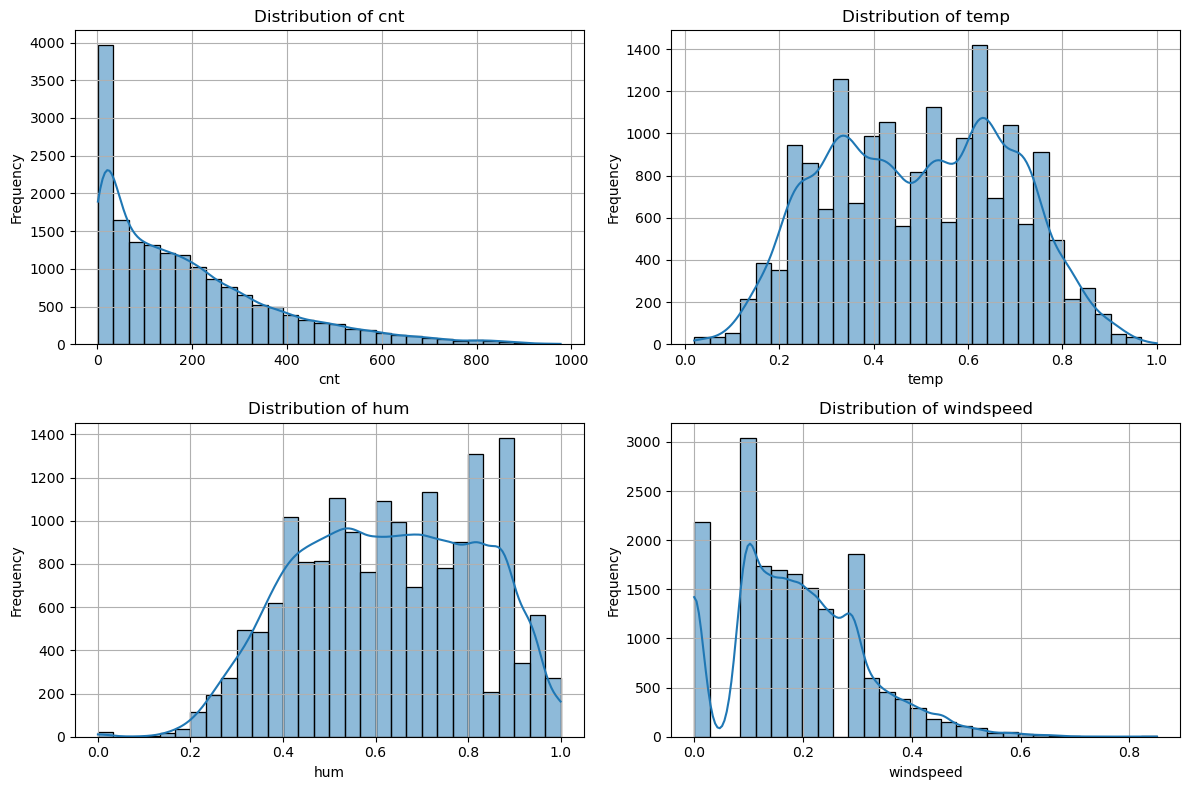

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_vars = ['cnt', 'temp', 'hum', 'windspeed']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, var in enumerate(numerical_vars):
    ax = axs[i//2, i%2]
    sns.histplot(hour_data[var], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()


# Bar Charts for Categorical Variables

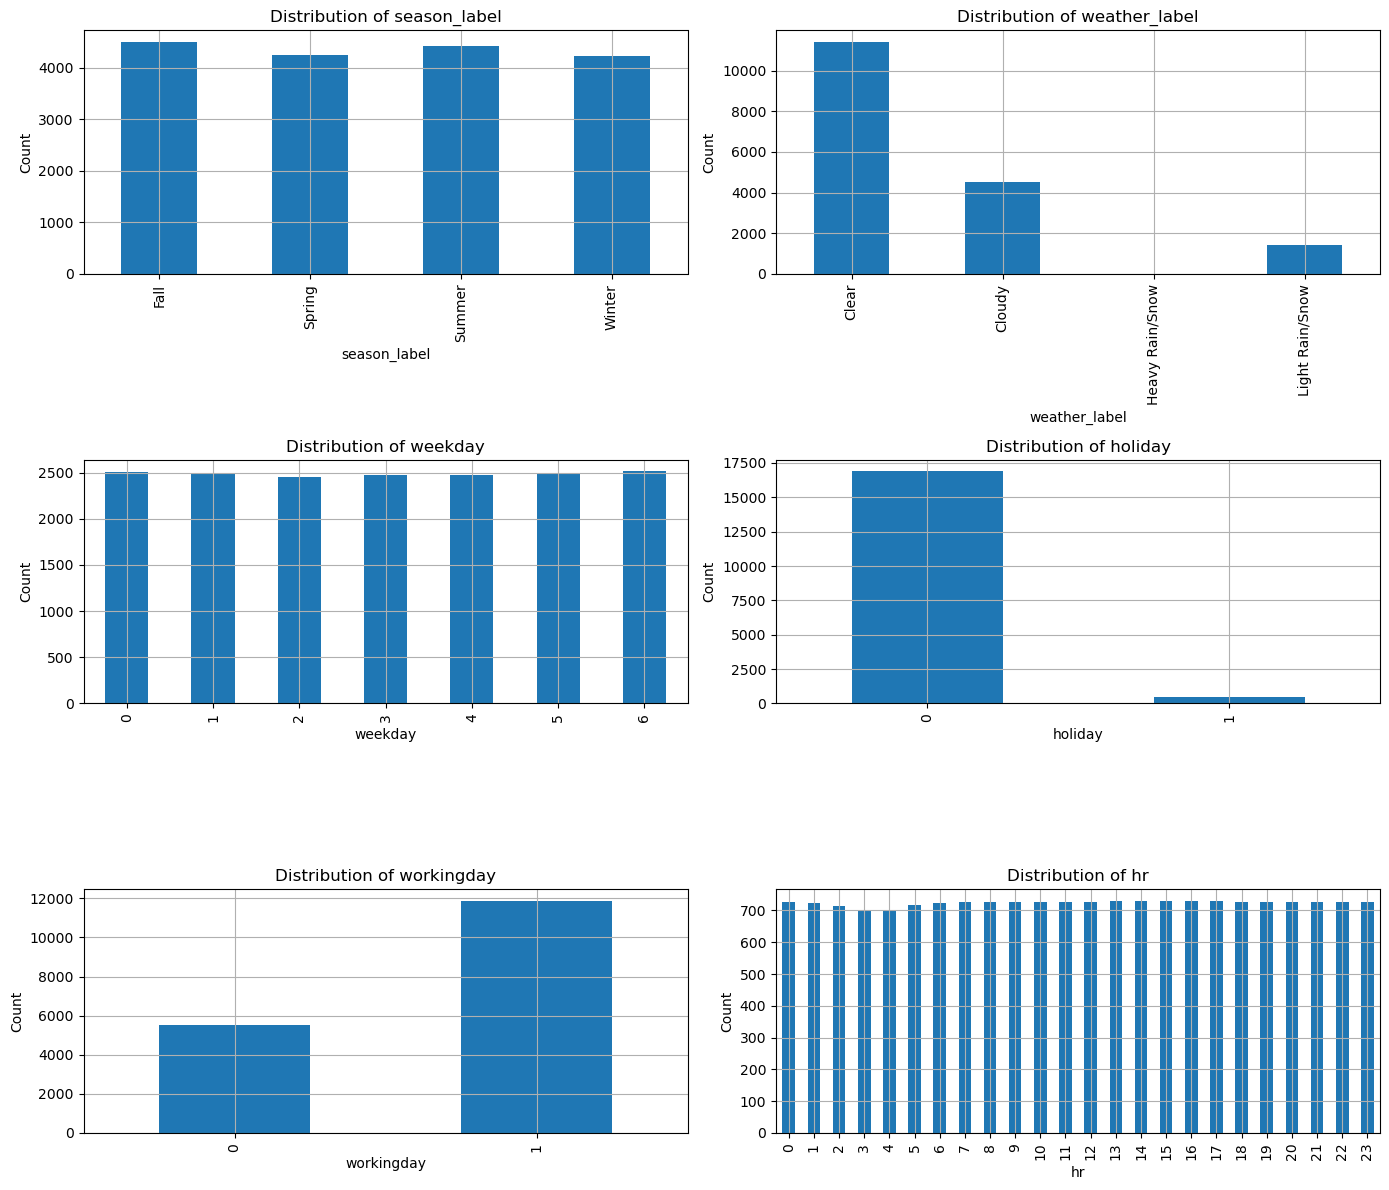

In [9]:
hour_data['season_label'] = hour_data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_data['weather_label'] = hour_data['weathersit'].map({
    1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
})

# List of categorical variables
categorical_vars = ['season_label', 'weather_label', 'weekday', 'holiday', 'workingday', 'hr']

fig, axs = plt.subplots(3, 2, figsize=(14, 12))
for i, var in enumerate(categorical_vars):
    ax = axs[i//2, i%2]
    hour_data[var].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.grid(True)

plt.tight_layout()
plt.show()


# Summary Statistics for Numerical Variables

In [10]:

numerical_vars = ['cnt', 'temp', 'hum', 'windspeed']

# Prepared summary stats dictionary
summary_stats = {}

for var in numerical_vars:
    skewness = hour_data[var].skew()
    if abs(skewness) > 0.5:
        # Skewed: Use five-number summary
        stats = hour_data[var].describe(percentiles=[0.25, 0.5, 0.75])
        summary_stats[var] = {
            'Min': stats['min'],
            'Q1 (25%)': stats['25%'],
            'Median': stats['50%'],
            'Q3 (75%)': stats['75%'],
            'Max': stats['max'],
            'Skewness': skewness
        }
    else:
        # Symmetric: Use mean and std
        summary_stats[var] = {
            'Mean': hour_data[var].mean(),
            'Std Dev': hour_data[var].std(),
            'Skewness': skewness
        }

# Converted to DataFrame
summary_df = pd.DataFrame(summary_stats).T
summary_df.index.name = 'Variable'
summary_df


,Min,Q1 (25%),Median,Q3 (75%),Max,Skewness,Mean,Std Dev
Variable,,,,,,,,
cnt,1.0,40.0000,142.000,281.0000,977.0000,1.277412,NaN,NaN
temp,NaN,NaN,NaN,NaN,NaN,-0.006021,0.496987,0.192556
hum,NaN,NaN,NaN,NaN,NaN,-0.111287,0.627229,0.192930
windspeed,0.0,0.1045,0.194,0.2537,0.8507,0.574905,NaN,NaN


# Frequency tables for categorical variables

In [11]:
categorical_vars = ['season_label', 'weather_label', 'weekday', 'holiday', 'workingday', 'hr']

for var in categorical_vars:
    print(f"\n Frequency Table: {var}")
    print(hour_data[var].value_counts().sort_index())



 Frequency Table: season_label
Fall      4496
Spring    4242
Summer    4409
Winter    4232
Name: season_label, dtype: int64

 Frequency Table: weather_label
Clear              11413
Cloudy              4544
Heavy Rain/Snow        3
Light Rain/Snow     1419
Name: weather_label, dtype: int64

 Frequency Table: weekday
0    2502
1    2479
2    2453
3    2475
4    2471
5    2487
6    2512
Name: weekday, dtype: int64

 Frequency Table: holiday
0    16879
1      500
Name: holiday, dtype: int64

 Frequency Table: workingday
0     5514
1    11865
Name: workingday, dtype: int64

 Frequency Table: hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hr, dtype: int64


# Relationships Between Two Numerical Variables

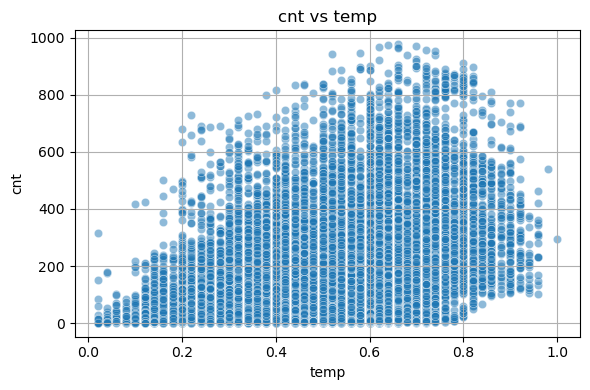

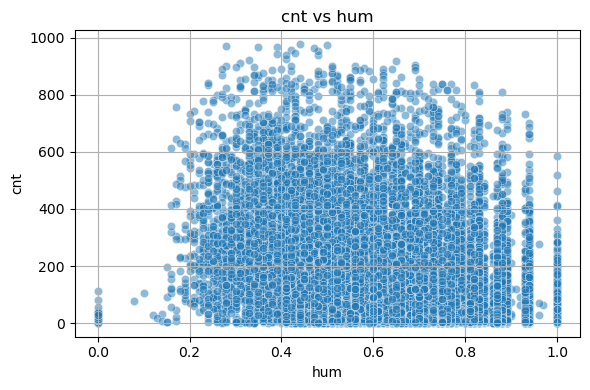

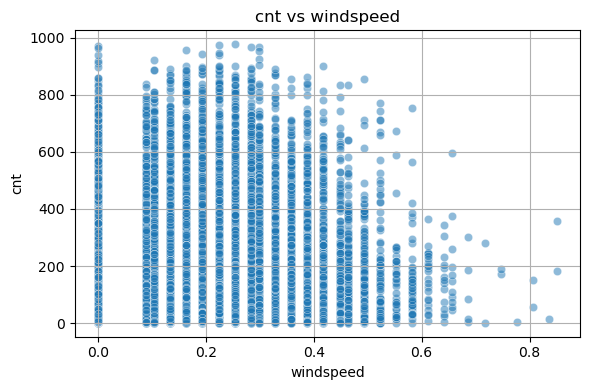

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical pairs
numerical_pairs = [('temp', 'cnt'), ('hum', 'cnt'), ('windspeed', 'cnt')]

for x, y in numerical_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=hour_data, x=x, y=y, alpha=0.5)
    plt.title(f'{y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Compare Numerical Across Categories

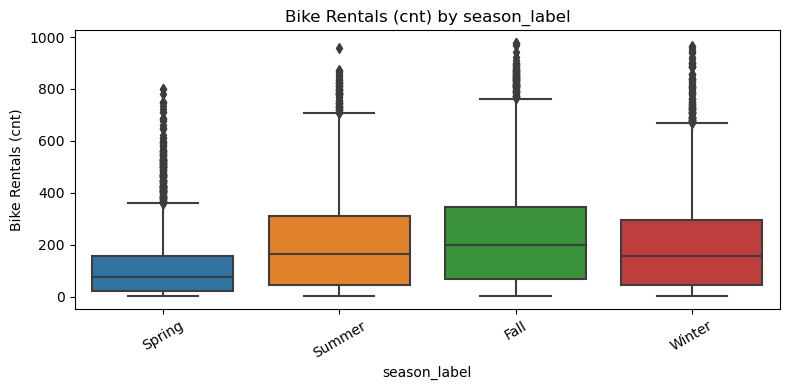

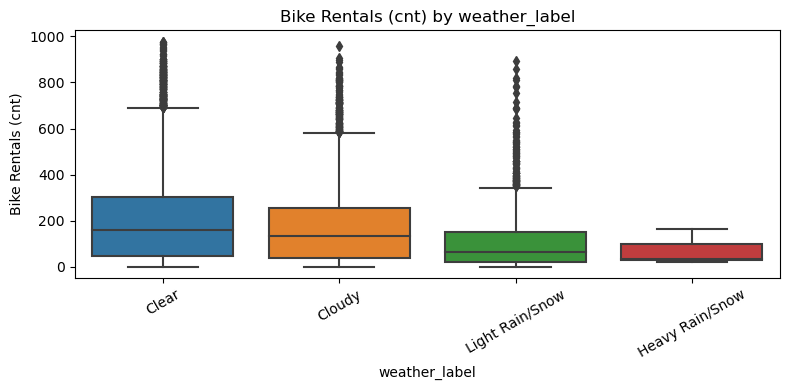

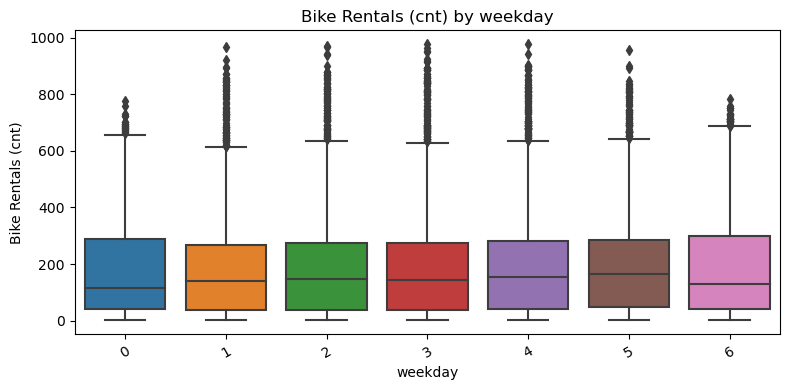

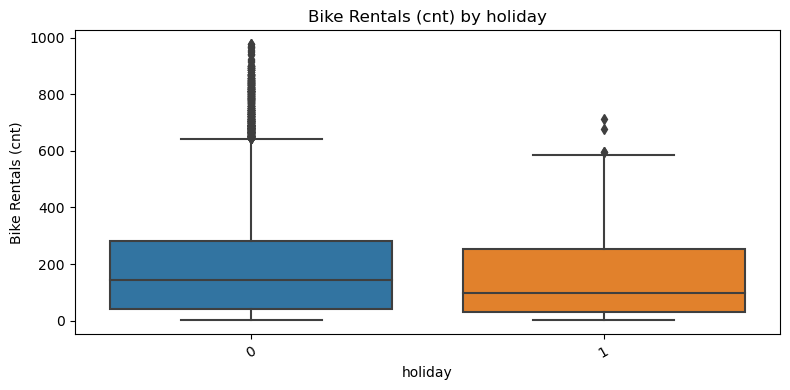

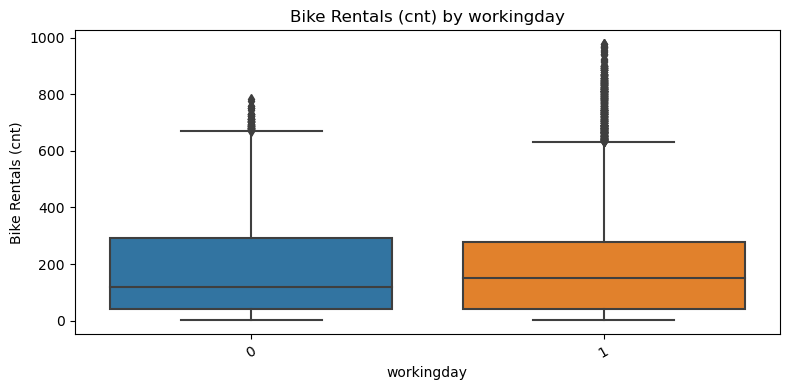

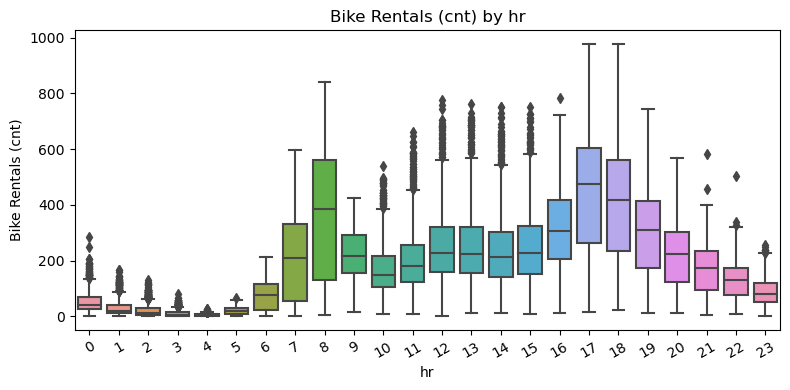

In [13]:
# List of categorical variables to compare with cnt
categorical_vars_for_boxplot = ['season_label', 'weather_label', 'weekday', 'holiday', 'workingday', 'hr']

for cat in categorical_vars_for_boxplot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=hour_data, x=cat, y='cnt')
    plt.title(f'Bike Rentals (cnt) by {cat}')
    plt.xlabel(cat)
    plt.ylabel('Bike Rentals (cnt)')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


# Two-Way Table – Between Two Categorical Variables

In [14]:
# Create a two-way (cross-tabulation) table between two categorical variables
two_way_table = pd.crosstab(hour_data['season_label'], hour_data['weather_label'])

print(" Two-Way Table: season_label vs weather_label\n")
print(two_way_table)


 Two-Way Table: season_label vs weather_label

weather_label  Clear  Cloudy  Heavy Rain/Snow  Light Rain/Snow
season_label                                                  
Fall            3280     947                0              269
Spring          2665    1205                3              369
Summer          2859    1144                0              406
Winter          2609    1248                0              375


# correlations using heatmaps

/var/folders/0z/2tzkzhg55v38bf6b0lxv6k6h0000gn/T/ipykernel_18610/1138954082.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hour_data.corr(), annot=True, cmap='coolwarm')


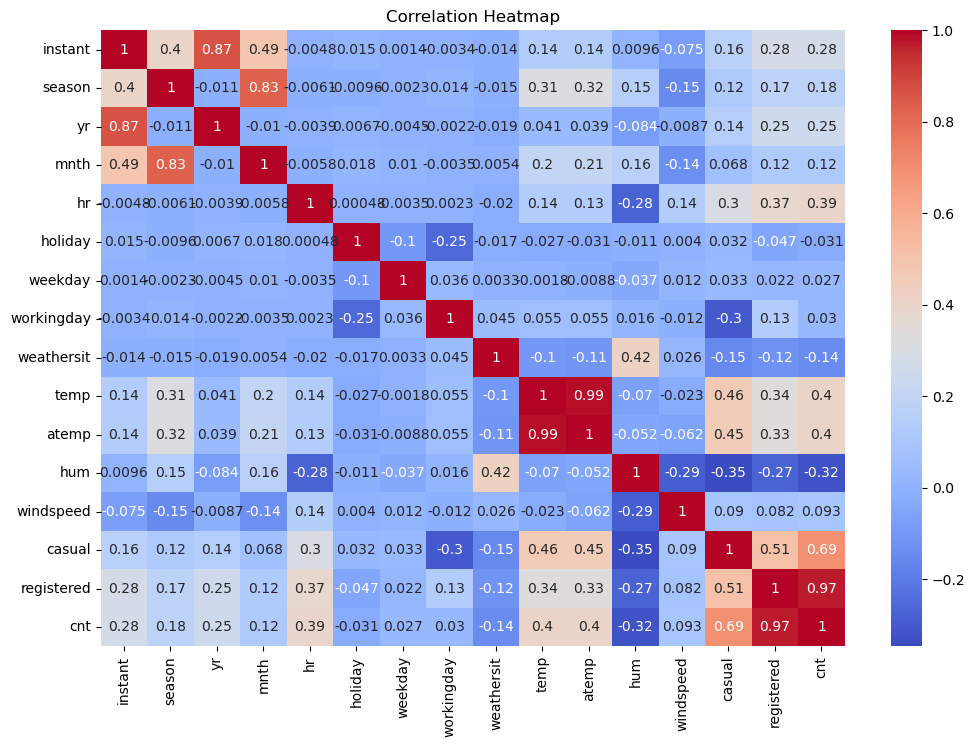

/var/folders/0z/2tzkzhg55v38bf6b0lxv6k6h0000gn/T/ipykernel_18610/1138954082.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hour_data.corr()['cnt'].sort_values(ascending=False)


cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(hour_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
hour_data.corr()['cnt'].sort_values(ascending=False)

# Feature Engineering Enhancements

In [16]:
hour_data['peak_hour'] = hour_data['hr'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)
hour_data[['hr', 'peak_hour']].head(24)

,hr,peak_hour
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,1
8,8,1
9,9,1


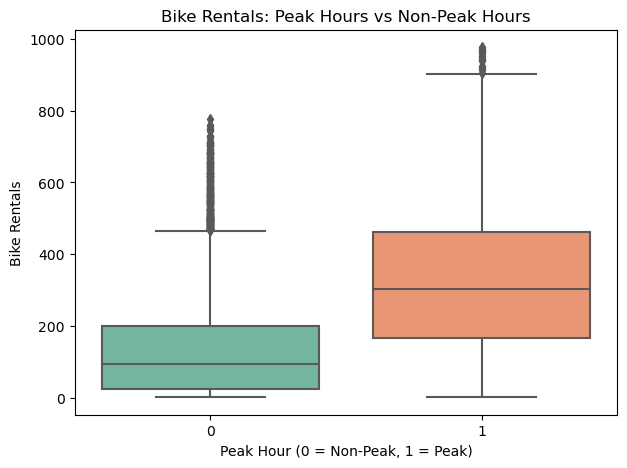

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.boxplot(data=hour_data, x='peak_hour', y='cnt', palette='Set2')
plt.title('Bike Rentals: Peak Hours vs Non-Peak Hours')
plt.xlabel('Peak Hour (0 = Non-Peak, 1 = Peak)')
plt.ylabel('Bike Rentals')
plt.show()

In [18]:
hour_data['season_label'] = hour_data['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
hour_data['weather_label'] = hour_data['weathersit'].map({1:'Clear', 2:'Cloudy', 3:'Light Rain/Snow', 4:'Heavy Rain/Snow'})
hour_data[['season', 'season_label', 'weathersit', 'weather_label']].head(10)

,season,season_label,weathersit,weather_label
0,1,Spring,1,Clear
1,1,Spring,1,Clear
2,1,Spring,1,Clear
3,1,Spring,1,Clear
4,1,Spring,1,Clear
5,1,Spring,2,Cloudy
6,1,Spring,1,Clear
7,1,Spring,1,Clear
8,1,Spring,1,Clear
9,1,Spring,1,Clear


# Addressed Outliers and Skewness

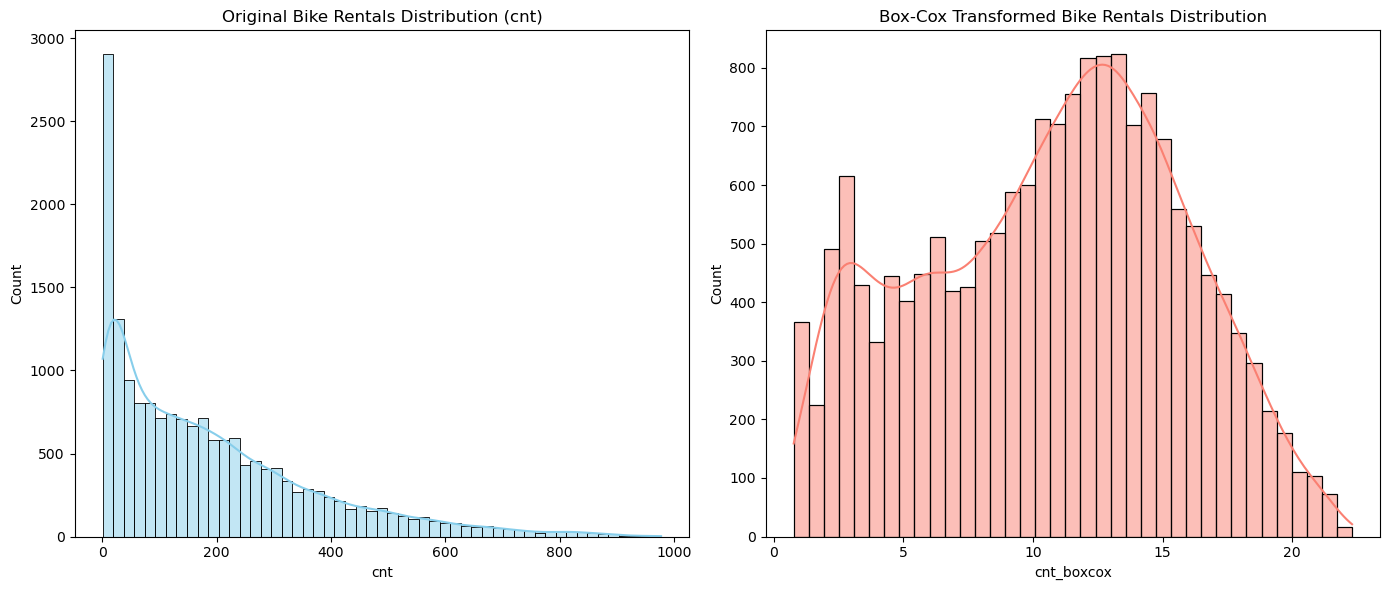

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# Apply Box-Cox transformation
hour_data['cnt_boxcox'], _ = boxcox(hour_data['cnt'] + 1)  # Add 1 to avoid log(0)

# Plot side-by-side comparison
plt.figure(figsize=(14, 6))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(hour_data['cnt'], kde=True, color='skyblue')
plt.title('Original Bike Rentals Distribution (cnt)')
plt.xlabel('cnt')

# Transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(hour_data['cnt_boxcox'], kde=True, color='salmon')
plt.title('Box-Cox Transformed Bike Rentals Distribution')
plt.xlabel('cnt_boxcox')

plt.tight_layout()
plt.show()


# One-Hot Encode + Split Data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Drop unnecessary or redundant features
features_to_drop = ['instant', 'dteday', 'atemp', 'casual', 'registered']
hour_data_cleaned = hour_data.drop(columns=features_to_drop)

# One-hot encoding for season_label and weather_label
hour_data_encoded = pd.get_dummies(hour_data_cleaned, columns=['season_label', 'weather_label'], drop_first=True)

# Define features and target
X = hour_data_encoded.drop(columns=['cnt'])
y = hour_data_encoded['cnt']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)